# <span style =  "color:green"> CHAPTER 11 : Visualization with Matplotlib, Pandas, and Seaborn </style>

In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl

In [3]:
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
mpl.style.use('bmh')

## STATEFUL INTERFACE

> All commands are given directly from pyplot which is usually aliased plt

In [5]:
x = [-3, 5, 7]
y = [10, 2, 5]

Text(0.5, 1.03, 'Figure Title')

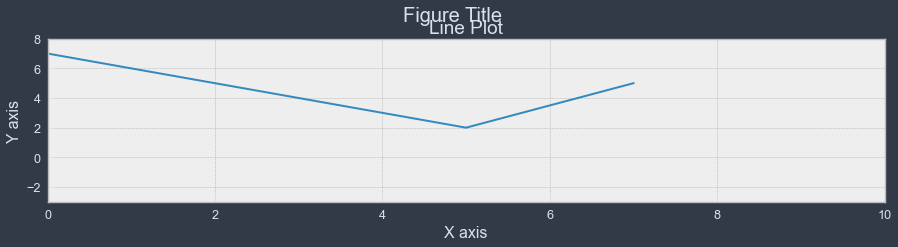

In [6]:
plt.figure(figsize= (15,3))
plt.plot(x,y)
plt.xlim(0,10)
plt.ylim(-3, 8)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size = 20, y=1.03)

## OBJECT ORIENTED INTERFACE

> Still uses pyplot, but typically, it is only to create the Figure and Axes objects during the first step. After creation, methods from these objects are called directly to alter the plot.

Text(0.5, 1.23, 'Figure title')

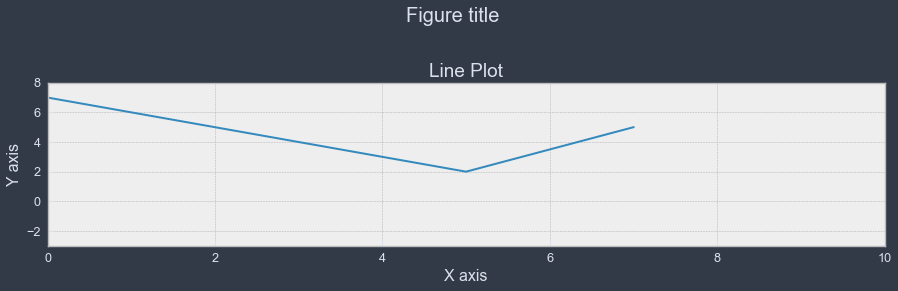

In [7]:
fig, ax = plt.subplots(figsize = (15, 3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure title', size = 20, y = 1.23)

## Building a graph from 0
#### (with the object oriented approach)

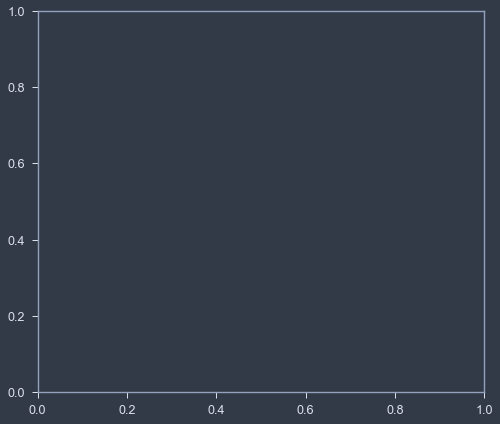

In [1]:
fig, ax = plt.subplots(nrows=1, ncols=1)

In [2]:
#we can cahnge the size of the figure
fig.get_size_inches()

array([8., 7.])

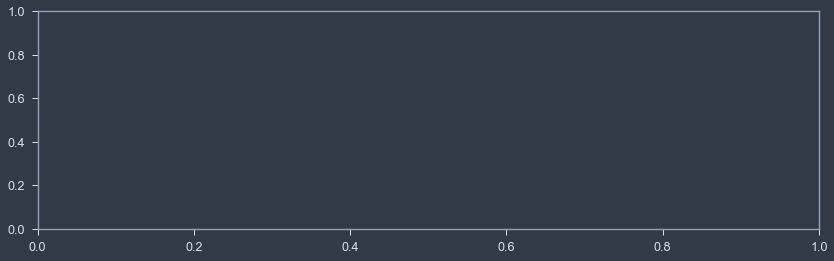

In [3]:
fig.set_size_inches(14,4)
fig

In [4]:
#we can see how many axes objects we have. We just have one now tho
fig.axes

[<AxesSubplot:>]

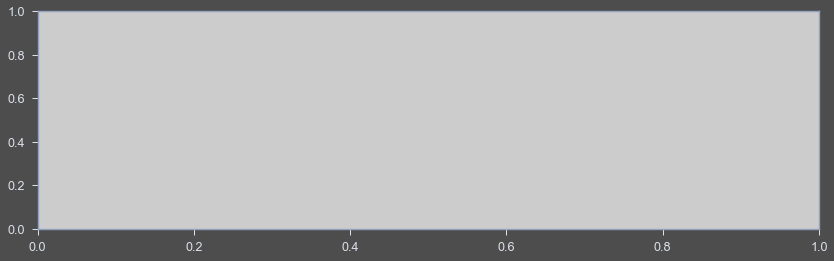

In [8]:
#To help visibly differentiate the Figure from the Axes, we can give each one a unique 
#***facecolor***.
fig.set_facecolor('.3')
ax.set_facecolor('.8')
fig

In [13]:
#Now that we have differentiated between the Figure and the Axes, let's take a
#look at all of the immediate children of the Axes with the ***get_children*** method:

ax_children = ax.get_children
ax_children

<bound method _AxesBase.get_children of <AxesSubplot:>>

### SPINES and AXIS

### SPINES

> ```Every basic plot has 4 spines and 2 axis objects (NO AXES, BUT AXIS).```

```The spines represent the data boundaries and are the four physical lines that you see bordering the darker gray rectangle (the Axes).```

In [14]:
spines = ax.spines
spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x2ee37924c88>),
             ('right', <matplotlib.spines.Spine at 0x2ee37924dc8>),
             ('bottom', <matplotlib.spines.Spine at 0x2ee37924ec8>),
             ('top', <matplotlib.spines.Spine at 0x2ee37924fc8>)])

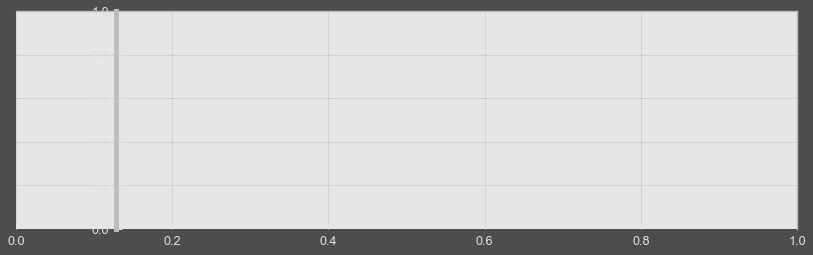

In [15]:
# The spines are contained in an ordered dictionary. Let's select the left spine and
# change its position and width so that it is more prominent 
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

#and also make the bottom spine invisible:

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)

#Let's see
fig

### AXIS

```Now, let's focus on the axis objects. We can access each axis directly through the
xaxis and yaxis attributes.```

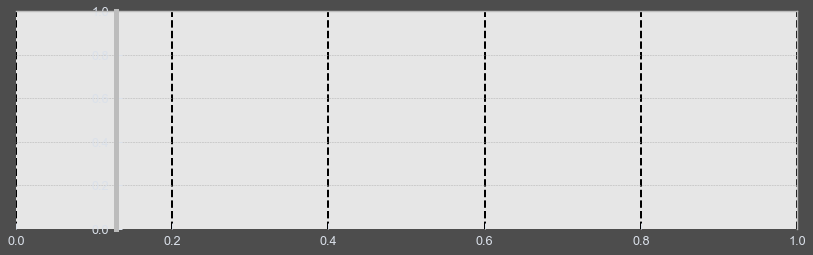

In [16]:
#setting changes to the lines in the x axis
ax.xaxis.grid(True, which='major', linewidth = 2, color='black', linestyle='--')
fig

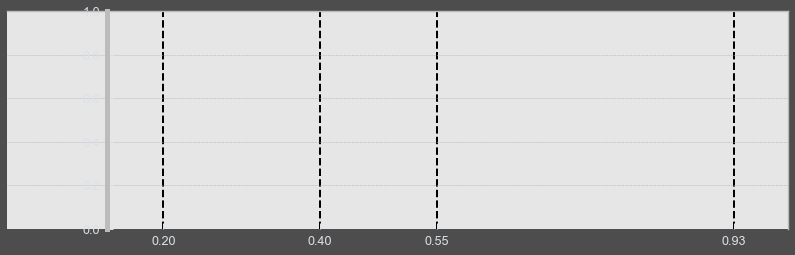

In [17]:
#selecting just some of those lines from the x axis
ax.xaxis.set_ticks([.2, .4, .55, .93])
fig

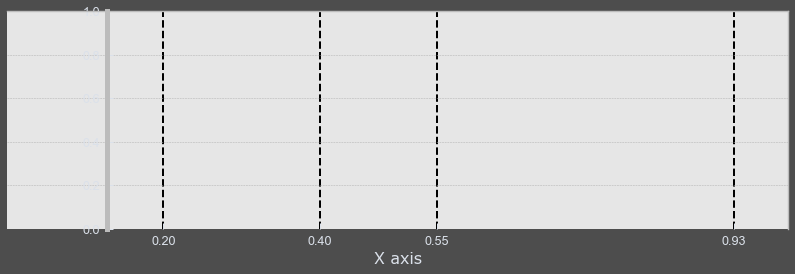

In [18]:
#selecting 
ax.xaxis.set_label_text('X axis', family = 'Verdana')
fig

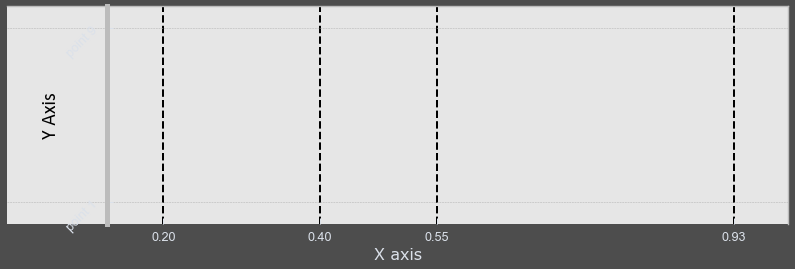

In [19]:
#Now with the the y axis

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20, color = 'black')
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

```One of the crucial ideas to grasp with the object-oriented approach is that each plotting
element has both getter and setter methods.```

> 1. ```The getter methods all begin with get_ and either retrieve a specific property or retrieve other plotting objects.```

> 2. ```Setter methods modify a specific property or an entire group of objects.```

#### A lot of matplotlib boils down to latching onto a specific plotting element and then examining and  modifying it via the getter and setter methods.

### ```It might be useful to make an analogy of the matplotlib hierarchy as a home. The home and all of its contents would be the Figure. Each individual room would be the Axes and the contents of the room would be the artists.```

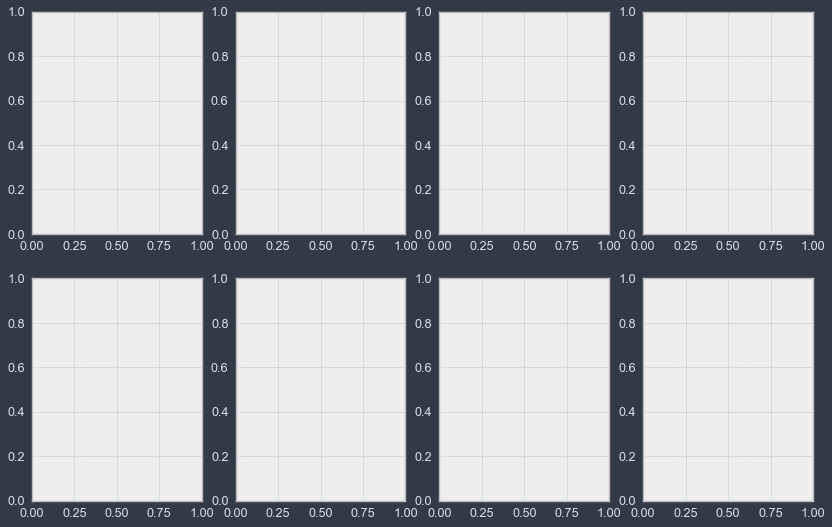

In [20]:
plot_objects = plt.subplots(2, 4, figsize = (14,9)) #2 figuras y 4 graficas for cada un, a

## visualizing data with matplotlib

In this recipe, we will visualize the trend in movie budgets over time by reducing our data
from pandas DataFrames down to NumPy arrays, which we will then pass to matplotlib
plotting functions.

In [21]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv'
movies = pd.read_csv(url)
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [22]:
# calculate the median budget for each year of each movie, and then find the five year rolling 
#average to smooth the data
med_budget = movies.groupby('title_year')['budget'].median()/1e6 
med_budget

title_year
1916.0     0.385907
1920.0     0.100000
1925.0     0.245000
1927.0     6.000000
1929.0     0.379000
            ...    
2012.0    17.000000
2013.0    20.000000
2014.0    15.000000
2015.0    14.400000
2016.0    22.500000
Name: budget, Length: 91, dtype: float64

In [23]:
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll

title_year
1916.0     0.385907
1920.0     0.242953
1925.0     0.243636
1927.0     1.682727
1929.0     1.421981
            ...    
2012.0    20.893000
2013.0    19.893000
2014.0    19.100000
2015.0    17.980000
2016.0    17.780000
Name: budget, Length: 91, dtype: float64

In [24]:
# Let's get our data into NumPy arrays. (we are doing by the old fashiones way)
years= med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [25]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

Text(0, 0.5, 'Millions of dollars')

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


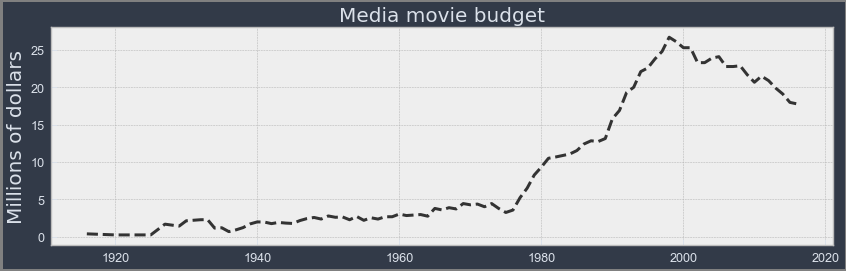

In [26]:
#create the plot
fig, ax = plt.subplots(figsize = (14,4), linewidth = 5, edgecolor= '.5')
ax.plot(years, budget, linestyle= '--', linewidth= 3, color= '.2', label= 'All Movie')

#we can change the text for the AXIS
text_kwargs = dict(fontsize=20, family='cursive')
ax.set_title('Media movie budget', **text_kwargs)
ax.set_ylabel('Millions of dollars', **text_kwargs)

In [27]:
# It's quite interesting that the median movie budget peaked in the year 2000 and
# has subsequently fallen. let's see why
movie_count = movies.groupby('title_year')['budget'].count()
movie_count

title_year
1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      1
         ... 
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, Length: 91, dtype: int64

```Any number of plots may be put on a single Axes, and these counts can be
plotted directly with the median budget as a bar chart.```

```As the units for both plots are completely different (dollars versus count), we can either create a secondary y axis or scale the counts to be in the same range as the budget.```

```We choose the latter and label each bar with its value as text, directly preceding```

In [28]:
ct = movie_count.values
ct_norm = ct/ct.max()*budget.max()

In [29]:
fifth_year = (years%5 ==0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

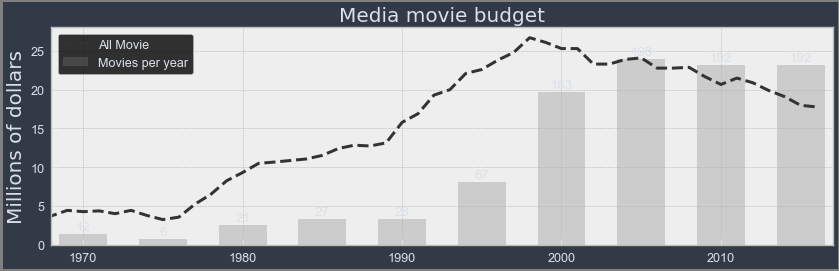

In [30]:
ax.bar(years_5, ct_norm_5, 3, facecolor= '.5', alpha= .3, label = 'Movies per year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend(facecolor= 'black')
fig

In [31]:
# This trend might not hold if we just look at the top 10 budgeted movies per year.
# Let's find the five year rolling median for just the top 10 movies per year:

top_ten = movies.sort_values('budget', ascending=False).groupby('title_year')['budget'].apply(lambda x: x.iloc[:10].median()/1e6)

In [32]:
top10_roll = top_ten.rolling(5, min_periods = 1).mean()
top10_roll

#The concept of rolling window calculation is most primarily used in signal processing 
#and time series data. esto agarra 1-5 rows y aplica la media, luego pasa a 2-6 rows y lo mismo y asi

title_year
1916.0      0.385907
1920.0      0.242953
1925.0      0.243636
1927.0      1.682727
1929.0      1.421981
             ...    
2012.0    192.900000
2013.0    195.900000
2014.0    191.700000
2015.0    186.800000
2016.0    189.100000
Name: budget, Length: 91, dtype: float64

In [33]:
top_ten

title_year
1916.0      0.385907
1920.0      0.100000
1925.0      0.245000
1927.0      6.000000
1929.0      0.379000
             ...    
2012.0    214.500000
2013.0    200.000000
2014.0    179.000000
2015.0    175.500000
2016.0    176.500000
Name: budget, Length: 91, dtype: float64

TypeError: __init__() got an unexpected keyword argument 'c'

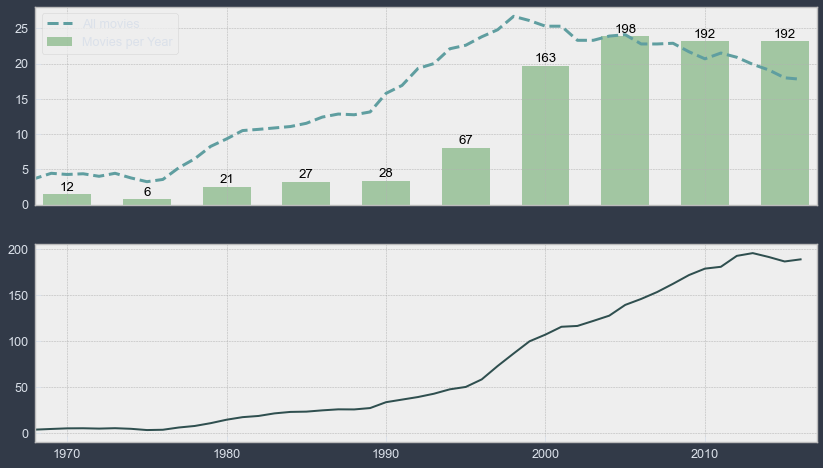

In [34]:
#Plotting both lines on the same scale would not look good.
#Let's create an entirely new Figure with two subplots (Axes)

fig2, ax_array = plt.subplots(2, 1, figsize=(14,8), sharex = True) #2 filas 1 columna
ax1 = ax_array[0]
ax2 = ax_array[1]

#copiamos el codigo de la grafica anterior y lo asignmos a x1

#la grafica de linea
ax1.plot(years, budget, linestyle='--', linewidth=3, color = '#5F9EA0', label= 'All movies')
#la grafica de barras
ax1.bar(years_5, ct_norm_5, 3, facecolor= '#8FBC8F', alpha= .8, label='Movies per Year', color = 'black')
ax1.set_xlim(1968, 2017)
ax1.legend()
plt.setp(ax1.get_xticklines(), visible = False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center', c= 'black')
    
#Ahora, la nueva grafica que queremos abajo de la anterior. usamos ax2

ax2.plot(years, top10_roll.values, color= '#2F4F4F', label='Top ten movies')
ax2.legend(loc = 'upper left', c = 'black', facecolor = 'black') #usar minusculas

#agregar texto a la parte de arriba y lado izquierdo del objeto fig

fig2.tight_layout()
fig2.suptitle('Median Movie Budget', y=1.02) # es que tan separado esta del titulo
fig2.text(0, .6, 'Millions of Dollars', rotation='vertical', ha='center')

#guardar la figura

# import os
# path = os.path.expanduser('~/Desktop/movie_budget.png')
# fig2.savefig(path, bbox_inches='tight')

In [35]:
#the bubble graph

cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movies[cols].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

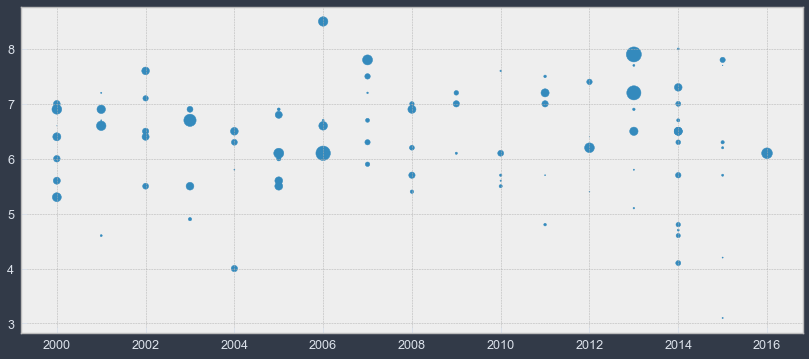

In [36]:
fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x= 'title_year', y = 'imdb_score', s = 'budget2', data = movie_samp)

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


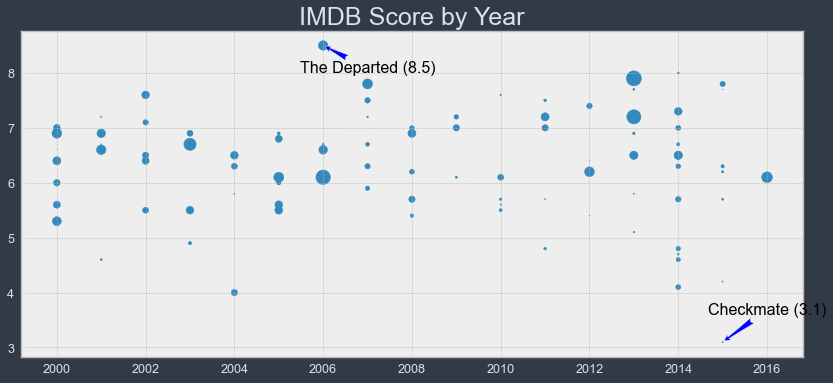

In [37]:
#Podemos agregarle anotaciones al valor mas alto y mas bajo

fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x= 'title_year', y = 'imdb_score', s = 'budget2', data = movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score),
                xytext=(year + 1, score + offset),
                s=title + ' ({})'.format(score),
                ha='center',
                color= 'black',
                size=16,
                arrowprops=dict(arrowstyle="fancy"))
ax.set_title('IMDB Score by Year', size=25)
ax.grid(True)

## Plotting basics with pandas

We say that the pandas plot method is a wrapper around matplotlib.

> The two-variable line and scatter plots, by default, use the index as the x axis and the values of the columns as the y axis. 

> The one-variable plots ignore the index and apply a transformation or aggregation to each variable to make their plots.

In [38]:
mpl.style.use('seaborn-colorblind')

In [9]:
#create a dataframe
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'Stephanie', 'Monte'],
data={'Apples':[20, 10, 40, 20, 50], 'Oranges':[35, 40, 25, 19, 33]})

[None, None, None, None]

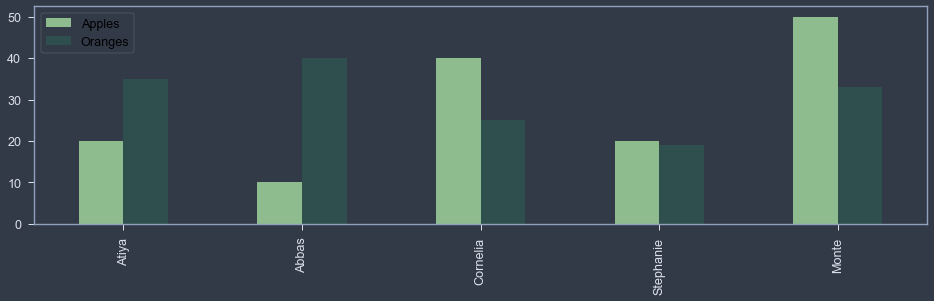

In [10]:
#bar plot

df.plot(kind = 'bar', color = ['#8FBC8F', '#2F4F4F'], figsize = (16, 4), grid = False, )
legend = plt.legend()
plt.setp(legend.get_texts(), color='Black')

[None, None, None, None]

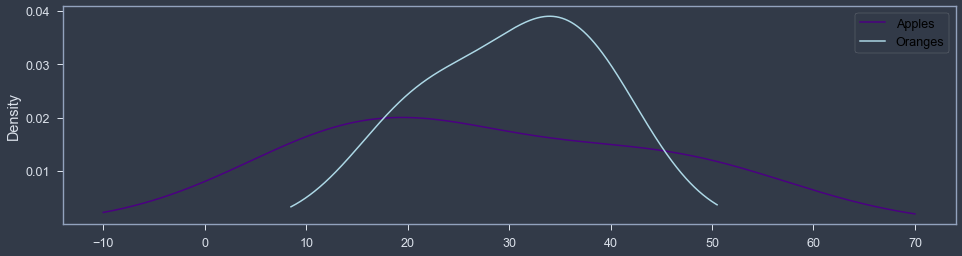

In [11]:
#now a KDE (kernel density estimates) or Density plot
df.plot(kind='kde', color = ['#4B0082', '#ADD8E6'], figsize= (16,4), grid = False)
legend = plt.legend()
plt.setp(legend.get_texts(), color = 'Black')

<AxesSubplot:title={'center':'Bar graph'}>

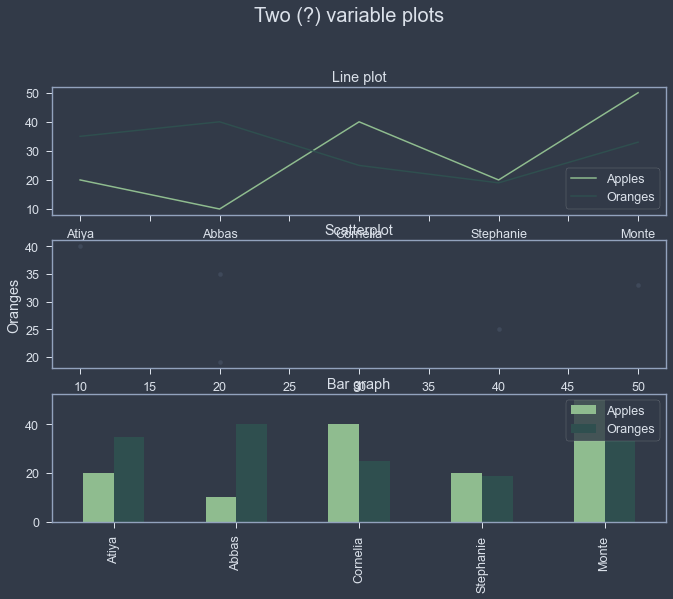

In [15]:
# Let's plot all two-variable plots together in a single Figure. The scatter plot is the
# only one that requires you to specify columns for the x and y values.
colors = ['#8FBC8F', '#2F4F4F'] 
fig, (ax1,ax2, ax3) = plt.subplots(3, 1, figsize = (11, 8))
fig.suptitle('Two (?) variable plots', size = 20, y= 1.02)
df.plot(kind='line', color = colors, ax = ax1, title= 'Line plot')
df.plot(kind= 'scatter', x= 'Apples', y= 'Oranges', ax=ax2, title= "Scatterplot")
df.plot(kind= 'bar', color= colors, ax=ax3, title='Bar graph')

[None, None, None, None]

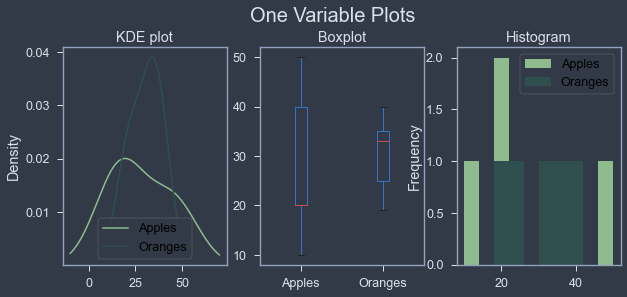

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=colors, ax=ax1, title='KDE plot', grid= False)
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=colors, ax=ax3, title='Histogram', grid= False)
legend = ax1.legend()
legend2 = ax3.legend()
plt.setp(legend.get_texts(), color = 'Black')
plt.setp(legend2.get_texts(), color = 'Black')

## Visualizing the flights dataset

```A simple strategy when beginning a visualization of any dataset is to focus only on univariate plots.```

```The most popular univariate plots tend to be:```

> ```bar charts for categorical data (usually strings)```

and

> ```histograms, boxplots, or KDEs for continuous data (always numeric)```

In [44]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv'
flights = pd.read_csv(url)
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [45]:
#Before we start plotting, let's calculate the number of diverted, cancelled, delayed, 
#and ontime flights. We already have Diverted and Cancelled. But they are as 0 and 1
#meanwhile the ARR delay is presented with normal numbers.

#BUT! we can technically get 0 and 1 (booleans) by passing a kind of filter..

flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
#.ge = Get Greater than or equal to of dataframe and other, element-wise (binary operator ge)
#esto regresa un array de booleans

cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1- flights[cols].any(axis = 1) #obtener todos aquellos que sean 0 (en tiempo)

cols.append('ON_TIME')
status = flights[cols].sum() #tener la suma de cada tipo de flights
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

<AxesSubplot:title={'center':'Arrival Delay'}, ylabel='Frequency'>

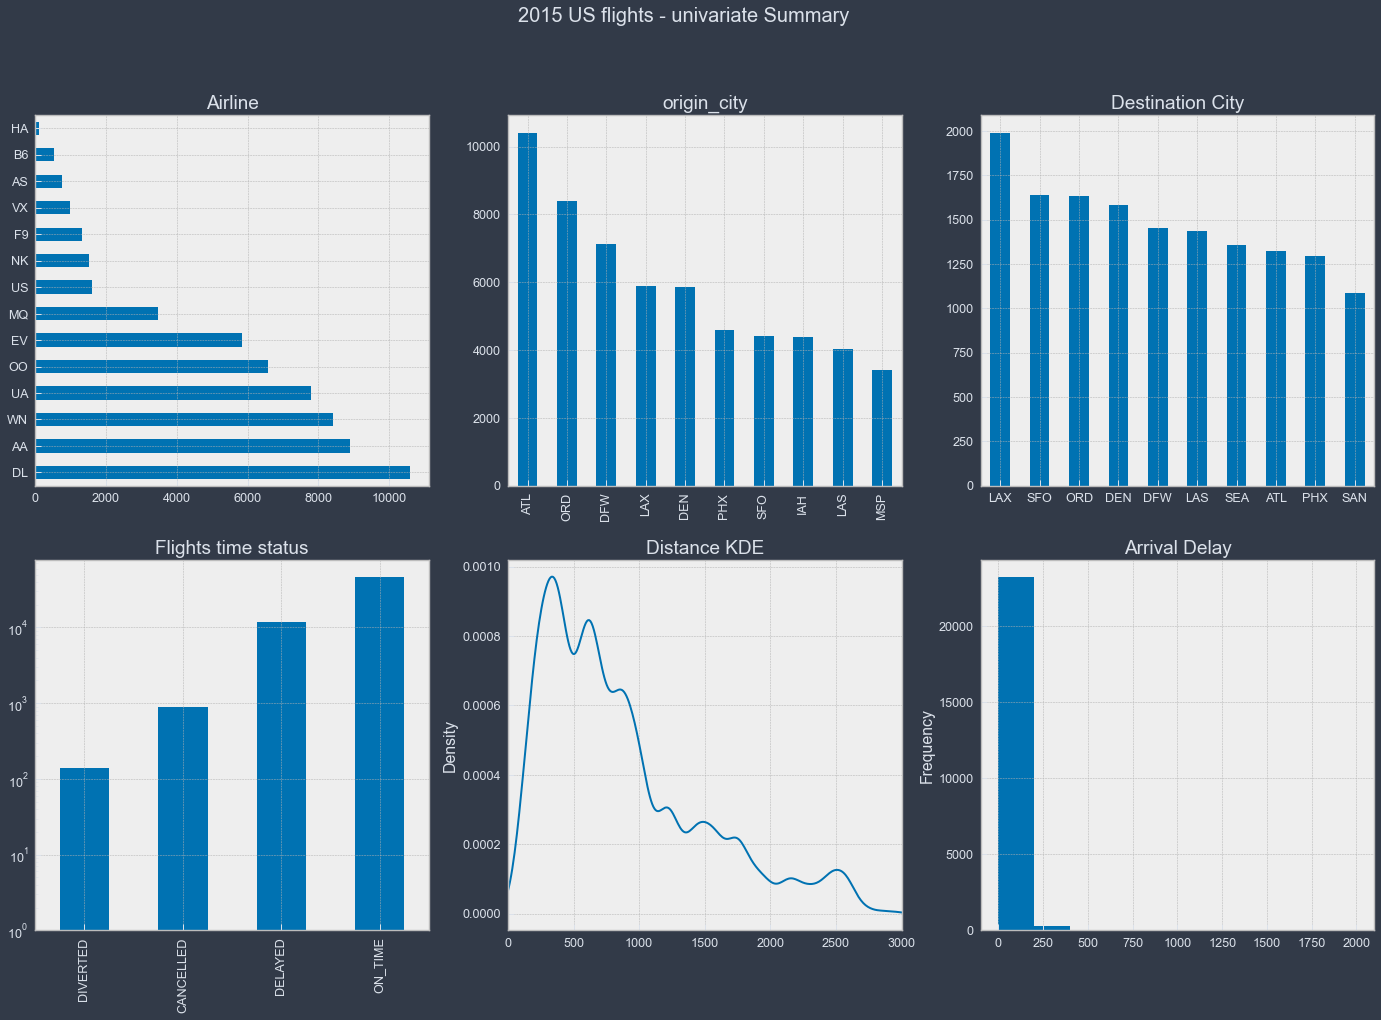

In [46]:
# Let's now make several plots on the same Figure for both categorical and
# continuous columns

fig, ax_array = plt.subplots(2, 3, figsize = (24, 15))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US flights - univariate Summary', size= 20)

#airline
ac = flights['AIRLINE'].value_counts()
ac.plot(kind= 'barh', ax=ax1, title = 'Airline')

#Origin city
oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, title= 'origin_city')

#Destination city
dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title= 'Destination City')

#flight time status
status.plot(kind='bar', ax=ax4, rot=90, log=True, title= 'Flights time status')

#flights distance
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000), title='Distance KDE')

#ARR DELAY
flights['ARR_DELAY'].plot(kind='hist', ax=ax6, title= 'Arrival Delay', range=(0,2000))

Before we move on to multivariate plots, let's plot the number of flights per week. 

This is the right situation to use a time series plot with the dates on the x axis. 

Unfortunately, we don't have pandas Timestamps in any of the columns, but we do have the month and day.

The to_datetime function has a nifty trick that identifies column names that match Timestamp components

In [47]:
hour = flights['SCHED_DEP']//100
minute = flights['SCHED_DEP']% 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour, MINUTE=minute)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


Then, almost by magic, we can turn this DataFrame into a proper Series of
Timestamps with the to_datetime function:

In [48]:
flightd_dep = pd.to_datetime(df_date)
flightd_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

<AxesSubplot:title={'center':'Flights per Week'}>

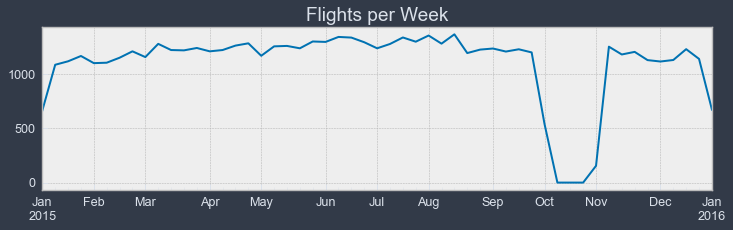

In [49]:
# Let's use this result as our new index and then find the count of flights per week
# with the resample method:
flights.index = flightd_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title = 'Flights per Week', grid=True)

```This plot is quite revealing. It appears that we have no data for the month of
October. Due to this missing data, it's quite difficult to analyze any trend visually,
if one exists.```

C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


Text(0.5, 1.0, 'Flights per Week (Interpolated Missing Data)')

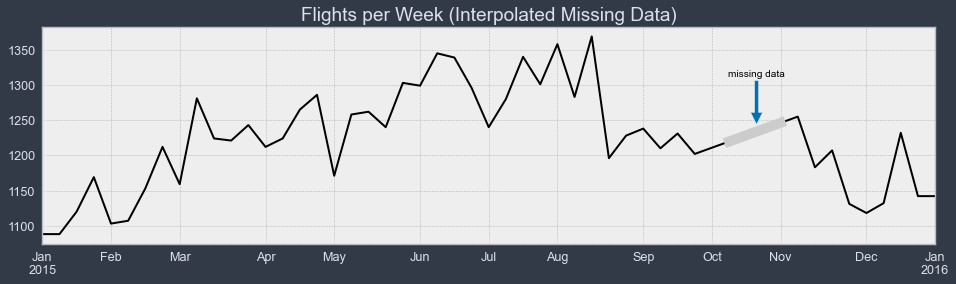

In [50]:
fc_miss = fc.where(fc > 1000)
fc_intp = fc_miss.interpolate(limit_direction='both')
ax = fc_intp.plot(color='black', figsize=(16,4))

fc_intp[fc < 500].plot(linewidth=10, grid=True, color='.8', ax=ax)
ax.annotate(xy=(.8, .55), xytext=(.8, .77),xycoords='axes fraction', 
            s='missing data',ha='center', size=10, arrowprops=dict(), color= 'Black')
ax.set_title('Flights per Week (Interpolated Missing Data)')

In [51]:
#ver paginas 460 para un ejemplo mas sobre como usar boxplot y combinar con 

## Stacking area charts to discover emerging trends

In [52]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/meetup_groups.csv'
meetup = pd.read_csv(url, parse_dates= ['join_date'], index_col='join_date')

In [53]:
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


In [54]:
# Let's get the number of people who joined each group each week:

group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

In [55]:
# Unstack the group level so that each meetup group has its own column of data:
gc2 = group_count.unstack('group', fill_value= 0)
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


In [56]:
# This data represents the number of members who joined that particular week.
# Let's take the cumulative sum of each column to get the grand total number of members:
group_total = gc2.cumsum()

In [57]:
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


In [58]:
# Many stacked area charts use the percentage of the total so that each row always
# adds up to 100 percent. Let's divide each row by the row total to find this percentage:
col_total = group_total.sum(axis='columns')
group_cum_pct = group_total.div(col_total, axis='index')
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  if __name__ == '__main__':
C:\Users\MSI\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotli

Text(0.86, 0.78, 'Machine Learning')

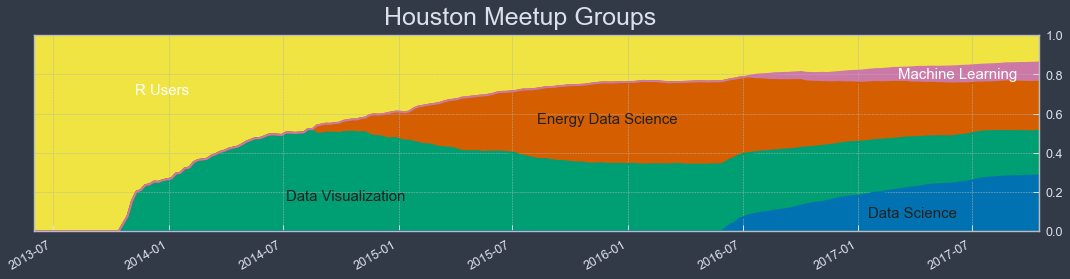

In [59]:
ax = group_cum_pct.plot(kind='area', figsize=(18,4), xlim=('2013-6', '2017-10-15'),
                        ylim=(0, 1), legend=False)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()
plot_kwargs = dict(xycoords='axes fraction', size=15)
ax.annotate(xy=(.1, .7), s='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization',color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), s='Data Science',color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning',color='w', **plot_kwargs)

## Understanding the differences between seaborn and pandas

In [5]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/employee.csv'
employee = pd.read_csv(url,parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [6]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='DEPARTMENT'>

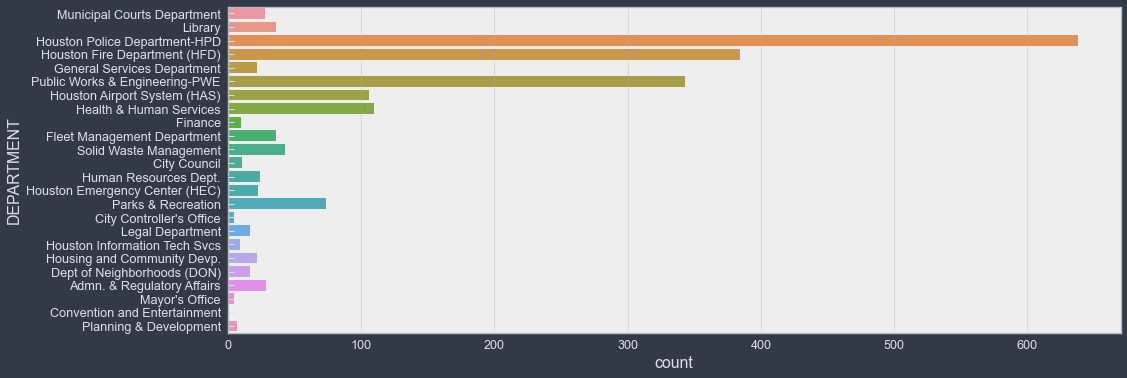

In [7]:
plt.figure(figsize=(16, 6))
sns.countplot(y='DEPARTMENT', data=employee)

<AxesSubplot:>

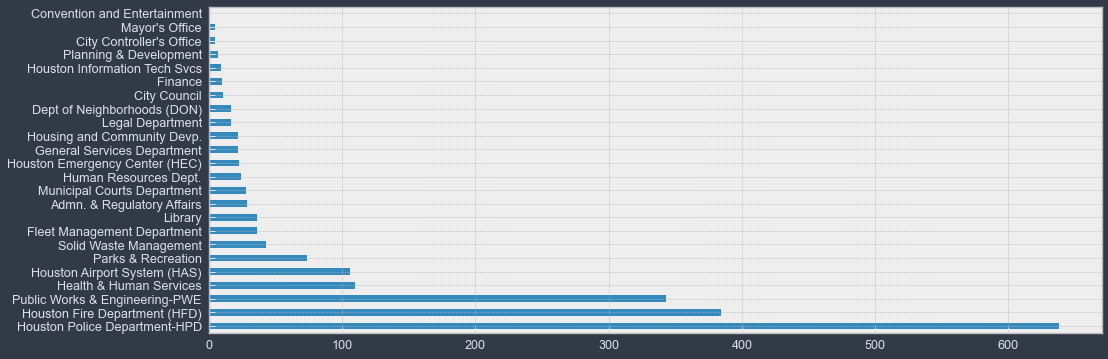

In [8]:
#With pandas it would have been:
plt.figure(figsize=(16,6))
employee['DEPARTMENT'].value_counts().plot(kind = 'barh')

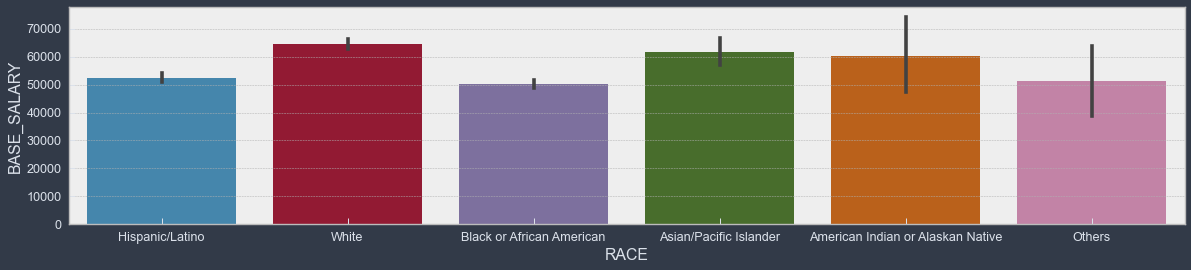

In [9]:
#Now, let's find the average salary for each race with seaborn:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(20, 4)

<AxesSubplot:xlabel='RACE'>

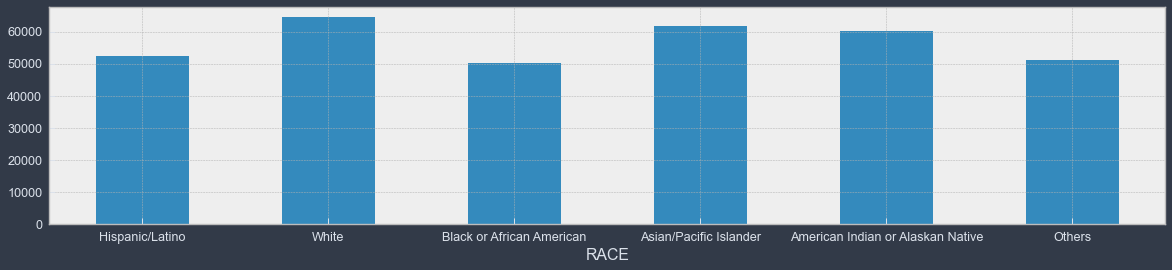

In [10]:
#replicate with Pandas
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
avg_sal.plot(kind='bar', figsize= (20,4), rot=0)

[None, None, None, None]

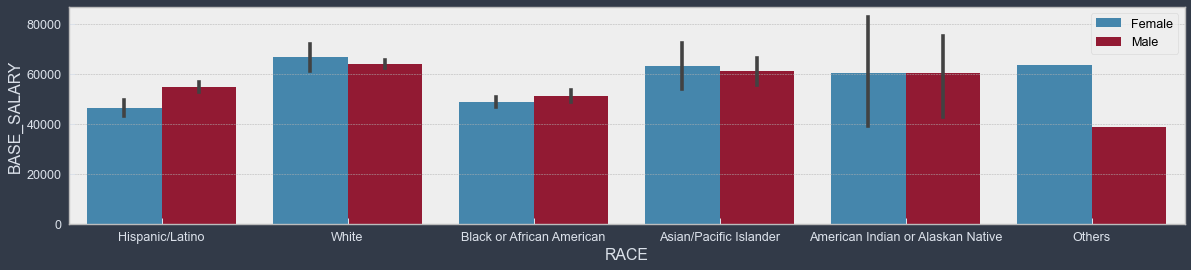

In [11]:
# Seaborn also has the ability to distinguish groups within the data through a third
# variable, hue, in most of its plotting functions.

plt.figure(figsize=(20,4))
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', data=employee)
legend = ax.legend()
plt.setp(legend.get_texts(), color='Black')

[None, None, None, None]

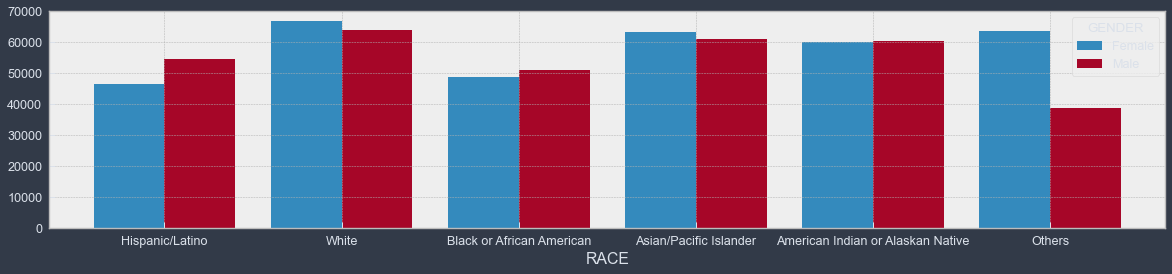

In [12]:
#with pandas
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'].mean().unstack('GENDER').plot(kind='bar', figsize=(20,4), rot=0,
width=.8)
legend = ax.legend()
plt.setp(legend.get_texts(), color='Black')

[None, None, None, None, None, None, None, None, None, None, None, None]

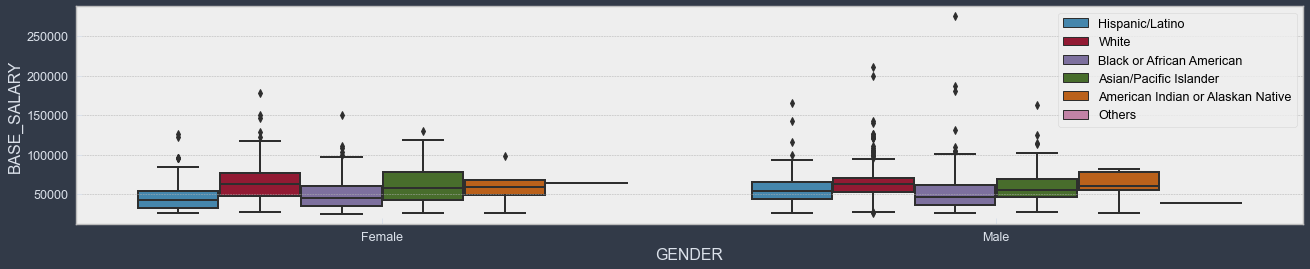

In [13]:
# A box plot is another type of plot that seaborn and pandas have in common. Let's
# create a box plot of salary by race and gender
plt.figure(figsize=(22,4))
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', hue= 'RACE', data=employee)
legend = ax.legend()
plt.setp(legend.get_texts(), color='Black')

> The seaborn Axes functions may all be called independently to produce a single plot. ***The
Grid functions, for the most part, use the Axes functions to build the grid.*** 

In [14]:
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


In [16]:
days_hired = pd.to_datetime('12-1-2016') - employee['HIRE_DATE']
days_hired.head(6)

0    3825 days
1    5979 days
2     667 days
3   12715 days
4   10027 days
5   11693 days
Name: HIRE_DATE, dtype: timedelta64[ns]

In [19]:
#convert to years
one_year = pd.Timedelta(days=365)
employee['YEARS_EXPERIENCE'] = days_hired/one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.479452
1,2000-07-19,16.380822
2,2015-02-03,1.827397
3,1982-02-08,34.835616
4,1989-06-19,27.471233


## Doing multivariate analysis with seaborn Grids


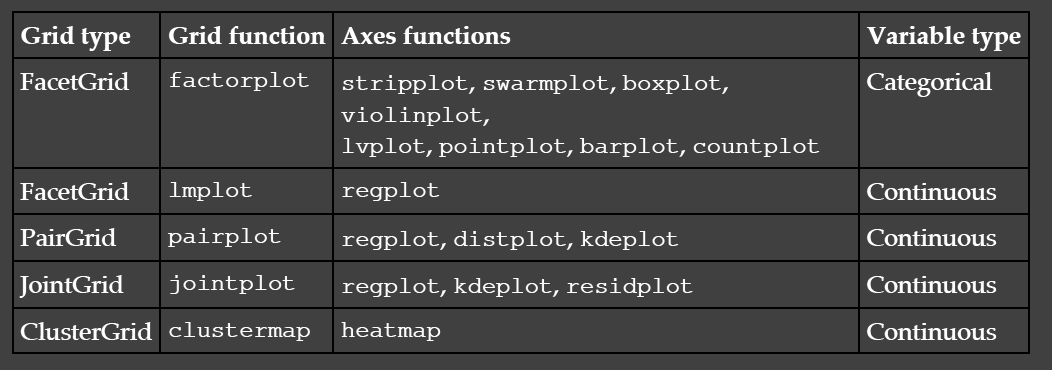

Let's create a basic scatter plot with a fitted regression line to represent the
relationship between years of experience and salary:

#### NOTA: FACTORPLOT HAS CHANGED TO CATPLOT

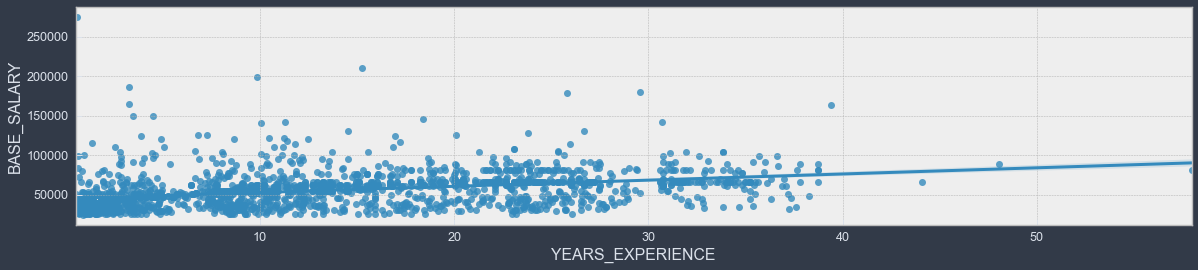

In [21]:
plt.figure(figsize=(20,4))
ax = sns.regplot(x='YEARS_EXPERIENCE', y= 'BASE_SALARY', data=employee)

seaborn.axisgrid.FacetGrid

<Figure size 1440x288 with 0 Axes>

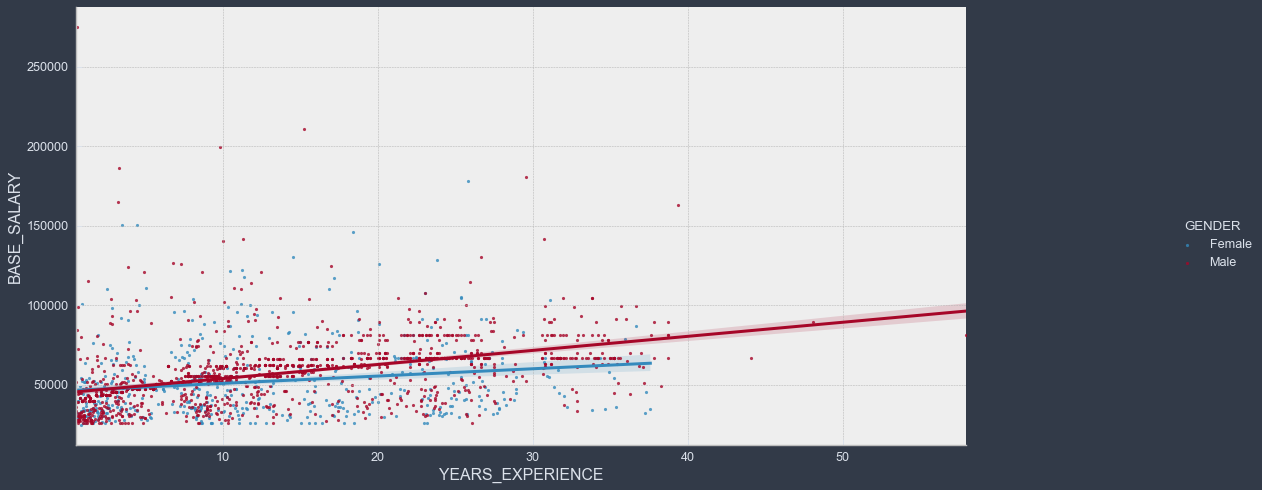

In [26]:
# The regplot function cannot plot multiple regression lines for different levels ofa third variable. 
# Let's use its parent function, lmplot, to plot a seaborn Grid that adds the same regression lines for males and females:
plt.figure(figsize=(20,4))
g= sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', hue='GENDER', scatter_kws={'s':10}, data=employee)
g.fig.set_size_inches(20, 7)
type(g)
#entonces, lmplot es para agregar figures o axes (graficas) en el mismo objeto(figure) para regplots. Ver tabla

```The real power of the seaborn Grid functions is their ability to add more Axes based on another variable```

```Each seaborn Grid has the col and row parameters available to divide the data further into different groups.```

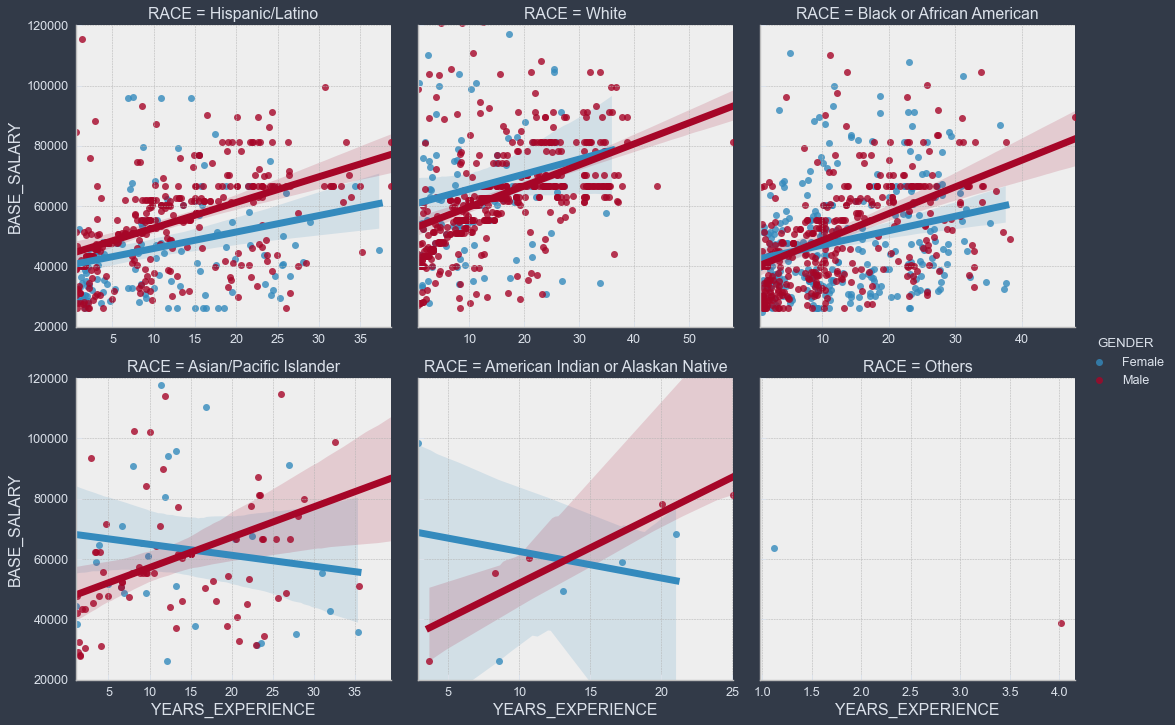

In [29]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', hue='GENDER', col='RACE', col_wrap=3, sharex=False,
                 line_kws = {'linewidth':7}, data=employee) #col_wrap es como el ax1,ax2,ax3... y col es para cada una de las observaiones de 
                                                            #sharex is so each graph is indpendent
grid.set(ylim=(20000, 120000))

#RECORDAR QUE EL AREA SOMBRADA DE LA GRAFICA ES EL INTERVALO DE CONFIANZA

We can do a similar type of analysis when we have categorical features.

In [36]:
# First, let's reduce the number of levels in the categorical variables race and department to the top 2 and
# 3 most common respectively

deps = employee['DEPARTMENT'].value_counts().index[:2]
race = employee['RACE'].value_counts().index[:3]
in_deps = employee['DEPARTMENT'].isin(deps)
in_race = employee['RACE'].isin(race)

In [38]:
emp2 = employee[in_deps & in_race].copy()
emp2['DEPARTMENT'] = emp2['DEPARTMENT']

In [40]:
emp2['DEPARTMENT'].value_counts()

Houston Police Department-HPD    591
Houston Fire Department (HFD)    377
Name: DEPARTMENT, dtype: int64

In [41]:
emp2['RACE'].value_counts()

White                        478
Hispanic/Latino              250
Black or African American    240
Name: RACE, dtype: int64

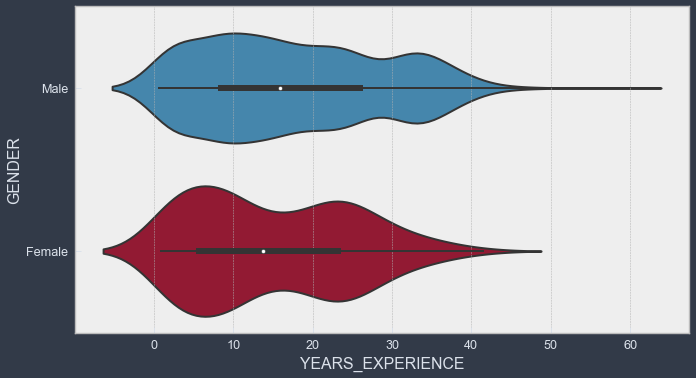

In [48]:
ax = sns.violinplot(x='YEARS_EXPERIENCE', y='GENDER',data=emp2)
ax.figure.set_size_inches(11,6)

```The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data.```

```This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak```

> ```the kernel density plot used for creating the violin plot is the same as the one added on top of the histogram. Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.```

In [57]:
sns.catplot(x='YEARS_EXPERIENCE', y='GENDER', col='RACE', height=5, aspect=2,
               data=emp2, kind='violin')

ValueError: Cannot use `row` and `col_wrap` together.

## Uncovering Simpson's paradox in the diamonds dataset with seaborn

```It is unfortunately quite easy to report erroneous results when doing data analysis. Simpson's paradox is one of the more common phenomena a that can appear in a data analysis.```

```It occurs when one group shows a higher result than another group, when all the data is aggregated, but it shows the opposite when the data is subdivided into different segments.```

In [58]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [59]:
#let's change the cut, color, and clarity columns into ordered categorical variables
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [60]:
#give the new categories to the table
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories= cut_cats, ordered=True)
diamonds['color'] = pd.Categorical(diamonds['color'], categories= color_cats, ordered=True)
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories= clarity_cats, ordered=True)

<AxesSubplot:xlabel='clarity', ylabel='price'>

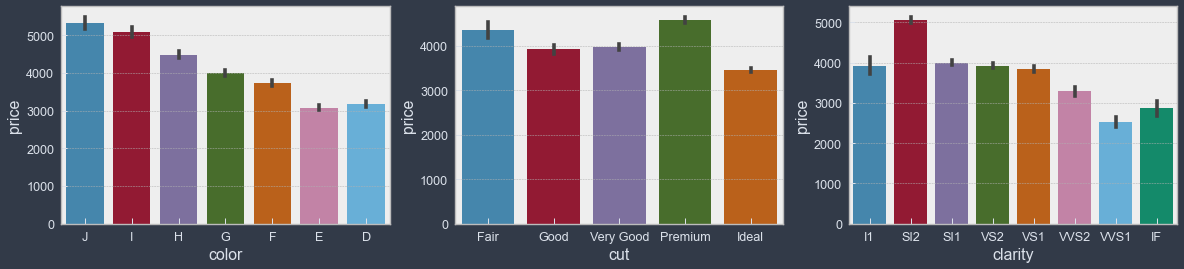

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)

> There seems to be a decreasing trend for color and price. The highest quality cut
and clarity levels also have low prices. How can this be?

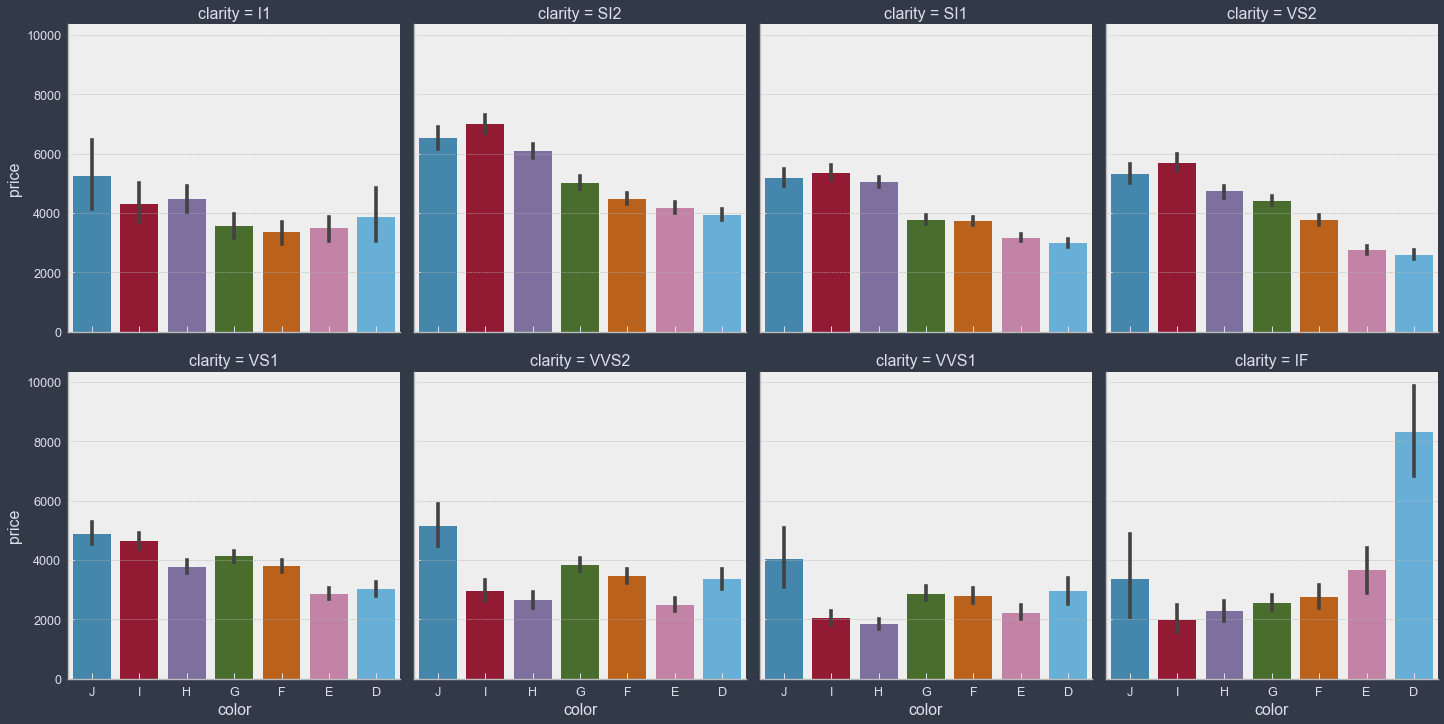

In [67]:
sns.catplot(x='color', y='price', col='clarity',col_wrap=4, data=diamonds, kind='bar')

```This plot is a little more revealing. Although price appears to decrease as the quality of color increases, it does not do so when clarity is at its highest level.``` 

```There is actually a substantial increase in price.```

```We have yet to look at just the price of the diamond without paying any attention to its size.```

```Now our story is starting to make a bit more sense. Higher quality diamonds appear to be smaller in size, which intuitively makes sense. Let's create a new variable that segments the carat values into five distinct sections, and then create a point plot.```

```The plot that follows accurately reveals that higher quality diamonds do, in fact, cost more money when they are segmented based on size:```

In [68]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)
# qcut = Discretize variable into equal-sized buckets based on rank or based on sample quantiles. 
#For example 1000 values for 10 quantiles would produce a Categorical object indicating 
#quantile membership for each data point

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

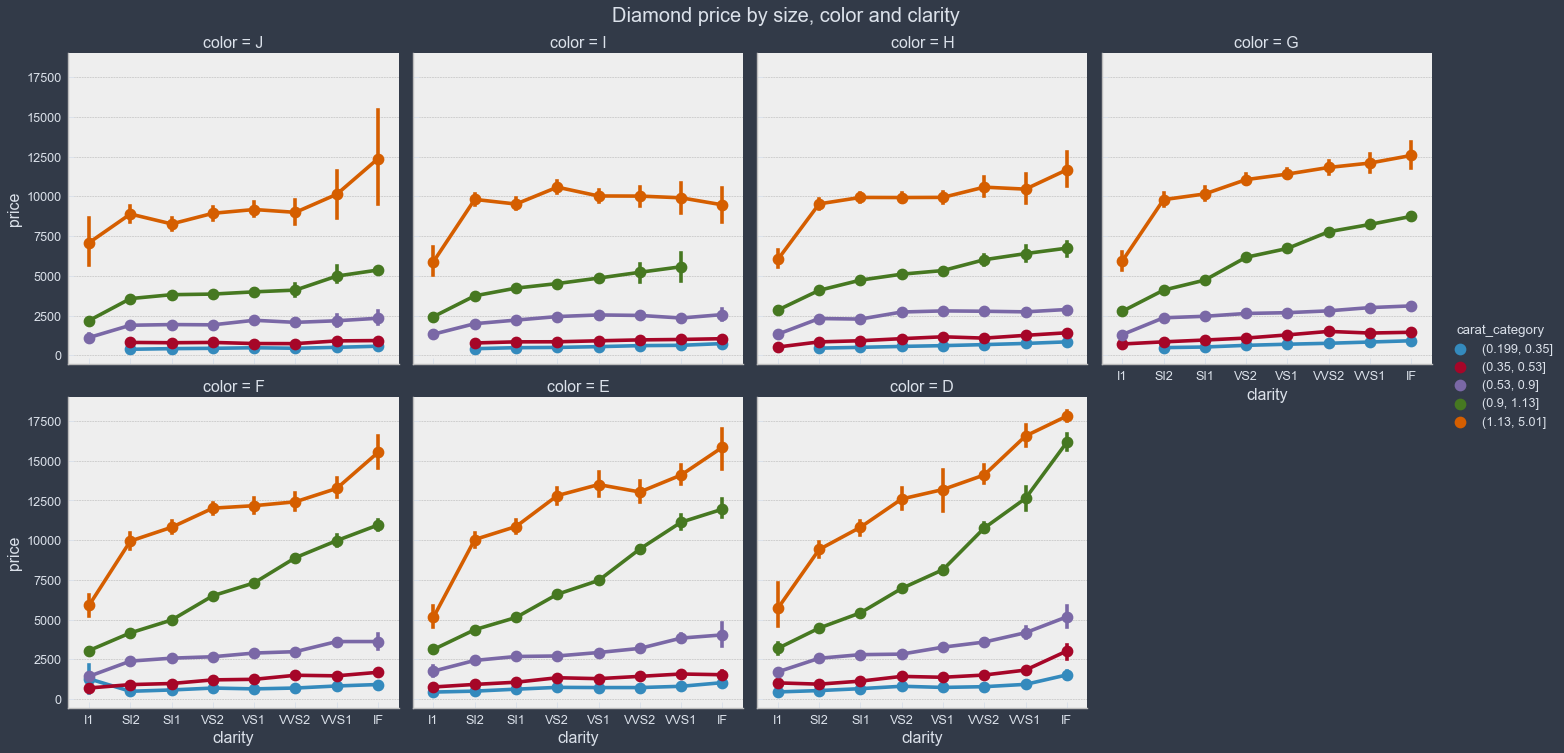

In [69]:
g = sns.catplot(x='clarity', y='price', data=diamonds, hue='carat_category', col='color',
                   col_wrap=4, kind='point')
g.fig.suptitle('Diamond price by size, color and clarity', y=1.02, size=20)

## There's more...

>```The 3 barplots for the diamond categories could have been created with the more advanced seaborn PairGrid constructor, which can plot a bivariate relationship.``` 

> ***Using PairGrid is a twostep process.***

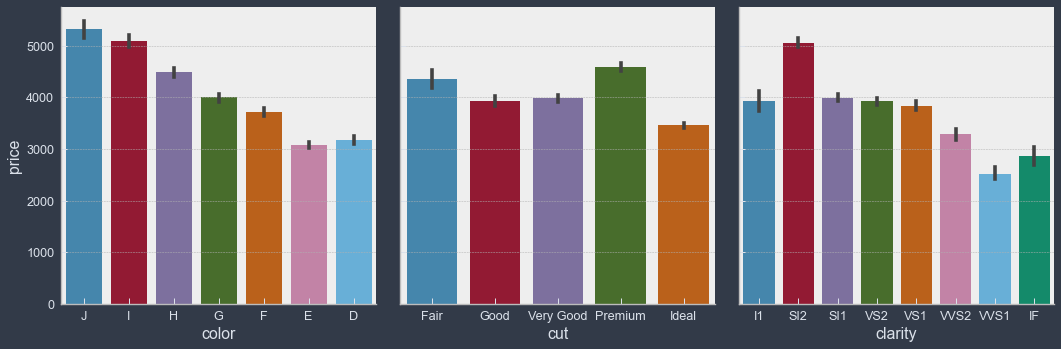

In [71]:
#define the PairGrid object with the values to graph
g = sns.PairGrid(diamonds, height=5, x_vars=["color", "cut", "clarity"], y_vars=["price"])
#write the kind of plot to use
g.map(sns.barplot)